In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd

In [39]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [41]:
#create engine using the hawaii.sqlite database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [42]:
#declare a base
Base = automap_base()

In [43]:
# reflect an existing database into a new model
Base.prepare(engine,reflect=True)

# reflect the tables
Base.classes.keys()
# We can view all of the classes that automap found

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results (data and prcp)
last_row = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).first()
# Calculate the date 1 year ago from the last data point in the database
for row in last_row:
    print(f'Last record was: {row}')
    

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').all()

for row in last_year:
    print(row)

Last record was: 2017-08-23
Last record was: 0.0
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08'

('2017-01-18', 0.07)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-21', 0.08)
('2017-01-22', 0.72)
('2017-01-23', 0.85)
('2017-01-24', 1.85)
('2017-01-25', 2.64)
('2017-01-26', 0.1)
('2017-01-27', 0.03)
('2017-01-28', 0.0)
('2017-01-29', 0.55)
('2017-01-30', 0.0)
('2017-01-31', 0.0)
('2017-02-01', 0.0)
('2017-02-02', 0.0)
('2017-02-04', None)
('2017-02-05', 0.0)
('2017-02-06', 0.0)
('2017-02-07', 1.79)
('2017-02-08', 0.0)
('2017-02-09', 0.0)
('2017-02-10', 0.0)
('2017-02-11', 0.73)
('2017-02-12', 1.83)
('2017-02-13', 0.0)
('2017-02-14', 0.01)
('2017-02-15', 0.07)
('2017-02-16', 0.13)
('2017-02-18', None)
('2017-02-19', 0.1)
('2017-02-20', 0.0)
('2017-02-21', 0.07)
('2017-02-22', 0.32)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-25', 0.12)
('2017-02-26', 0.0)
('2017-02-27', 0.0)
('2017-02-28', 0.58)
('2017-03-01', 2.0)
('2017-03-02', 0.58)
('2017-03-03', 0.56)
('2017-03-04', 0.0)
('2017-03-05', 0.35)
('2017-03-06', 0.0)
('2017-03-07', 0.0)
('2017-03-08', 0.0)
('2017-03-09', 0.

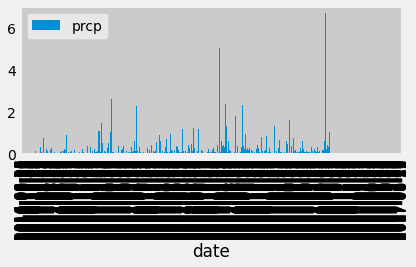

In [96]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_df = pd.DataFrame(last_year, columns=['date','prcp'])
last_year_df = last_year_df[last_year_df != 0]
last_year_df = last_year_df.dropna(how='any')
last_year_df.set_index('date',inplace=True)
last_year_df
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
